In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the necessary requirement

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## GOOGLE PAYSTORE DATASET FROM THE TASK

In [ ]:
#Reading the csv file into a pandas dataframe

df = pd.read_csv('/content/drive/MyDrive/Google-Playstore.csv')

#### Exploratory Data analysis - EDA BEFORE CLEANING

In [ ]:
#Total rows and columns in the dataset
df.shape

(2312944, 24)

In [ ]:
#looking at the dataset in a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [ ]:
#first 5 rows
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [ ]:
#statistical view of the numerical columns in the dataset
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [ ]:
#taking a quick view of the cardinality of each dataframe
print('df', '\n', df.select_dtypes('object').nunique())

df 
 App Name             2177943
App Id               2312944
Category                  48
Installs                  22
Currency                  15
Size                    1657
Minimum Android          154
Developer Id          758371
Developer Website     810440
Developer Email       950456
Released                4158
Last Updated            3918
Content Rating             6
Privacy Policy        977743
Scraped Time           67374
dtype: int64


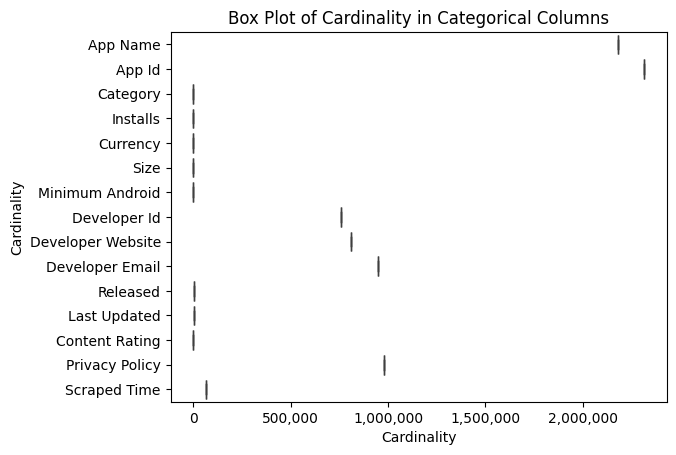

In [ ]:
import matplotlib.ticker as ticker

# Cardinality data from your result
cardinality = {
    "App Name": 2177943,
    "App Id": 2312944,
    "Category": 48,
    "Installs": 22,
    "Currency": 15,
    "Size": 1657,
    "Minimum Android": 154,
    "Developer Id": 758371,
    "Developer Website": 810440,
    "Developer Email": 950456,
    "Released": 4158,
    "Last Updated": 3918,
    "Content Rating": 6,
    "Privacy Policy": 977743,
    "Scraped Time": 67374
}

# Convert to DataFrame
df_cardinality = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Cardinality'])

# Plot
ax = sns.boxplot(x='Cardinality', y='Column', data=df_cardinality)

# Format y-axis to show full numbers (disable scientific notation)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Customize plot
plt.title("Box Plot of Cardinality in Categorical Columns")
plt.ylabel("Cardinality")
plt.show()

#### DATA CLEANING - Standardizing column names

In [ ]:
# Store old column names
old_columns = df.columns.tolist()

In [ ]:
df.columns = df.columns.str.lower().str.replace('app name', 'app_name') \
                         .str.replace('app id', 'app_id') \
                         .str.replace('rating count', 'rating_count') \
                         .str.replace('minimum installs', 'minimum_installs') \
                         .str.replace('maximum installs', 'maximum_installs') \
                         .str.replace('minimum andriod', 'minimum_android') \
                         .str.replace('developer id', 'developer_id') \
                         .str.replace('developer website', 'developer_website') \
                         .str.replace('developer email', 'developer_email') \
                         .str.replace('last updated', 'last_updated') \
                         .str.replace('content rating', 'content_rating') \
                         .str.replace('privacy policy', 'privacy_policy') \
                         .str.replace('ad supported', 'ad_supported') \
                         .str.replace('in app purchases', 'in_app_purchases') \
                         .str.replace('editors choice', 'editors_choice') \
                         .str.replace('scraped time', 'scraped_time')

In [ ]:
# Store new column names
new_columns = df.columns.tolist()

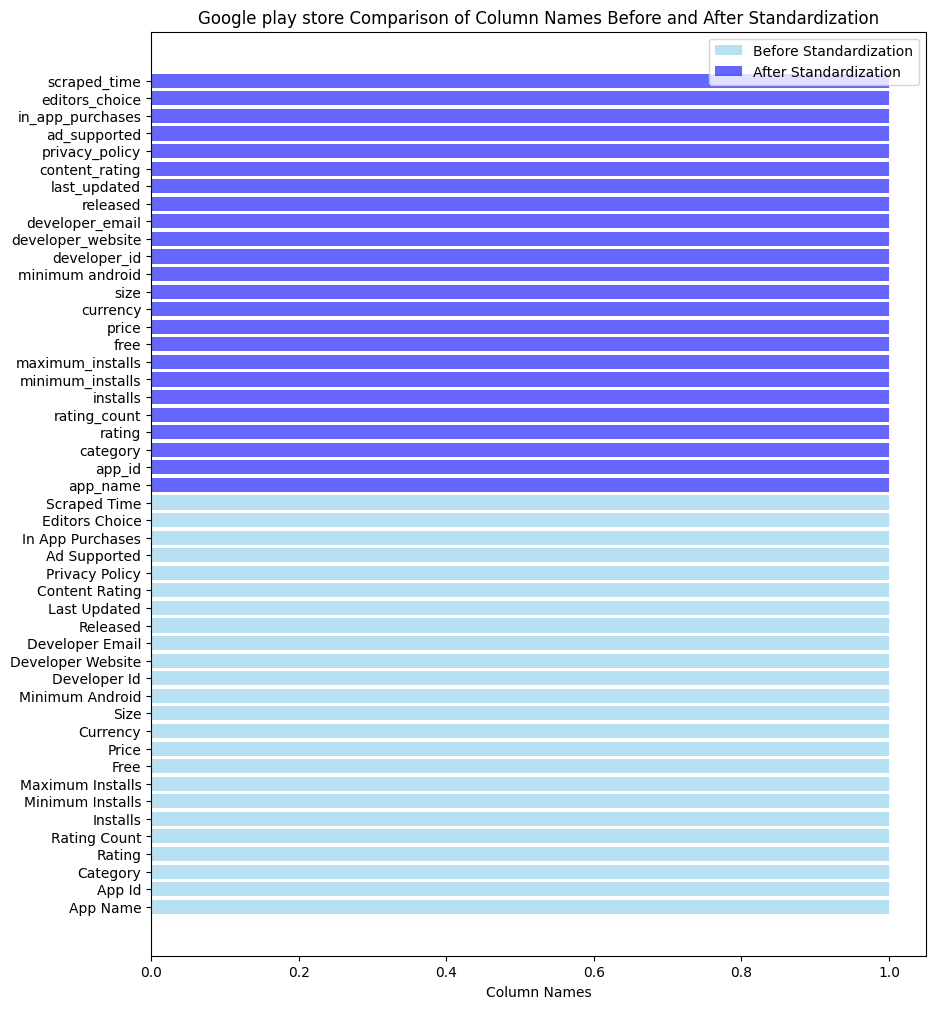

In [ ]:
# Plotting
plt.figure(figsize=(10, 12))

# Before and after plot
plt.barh(old_columns, [1] * len(old_columns), color='skyblue', alpha=0.6, label='Before Standardization')
plt.barh(new_columns, [1] * len(new_columns), color='blue', alpha=0.6, label='After Standardization')

plt.xlabel('Column Names')
plt.title('Google play store Comparison of Column Names Before and After Standardization')
plt.legend(loc='upper right')

plt.show()

#### DATA CLEANING - MISSING VALUES

In [ ]:
#Checking the number of null values in the dataset
missing_values = {col: df[col].isna().sum() for col in df.columns}

# Convert to DataFrame
missing_df = pd.DataFrame(list(missing_values.items()), columns=['columns', 'total_missing'])

# Display the DataFrame
print(missing_df)

              columns  total_missing
0            app_name              5
1              app_id              0
2            category              0
3              rating          22883
4        rating_count          22883
5            installs            107
6    minimum_installs            107
7    maximum_installs              0
8                free              0
9               price              0
10           currency            135
11               size            196
12    minimum android           6530
13       developer_id             33
14  developer_website         760835
15    developer_email             31
16           released          71053
17       last_updated              0
18     content_rating              0
19     privacy_policy         420953
20       ad_supported              0
21   in_app_purchases              0
22     editors_choice              0
23       scraped_time              0


<ipython-input-42-edbc97077b22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="total_missing", y="columns", data=missing_df, palette="viridis")


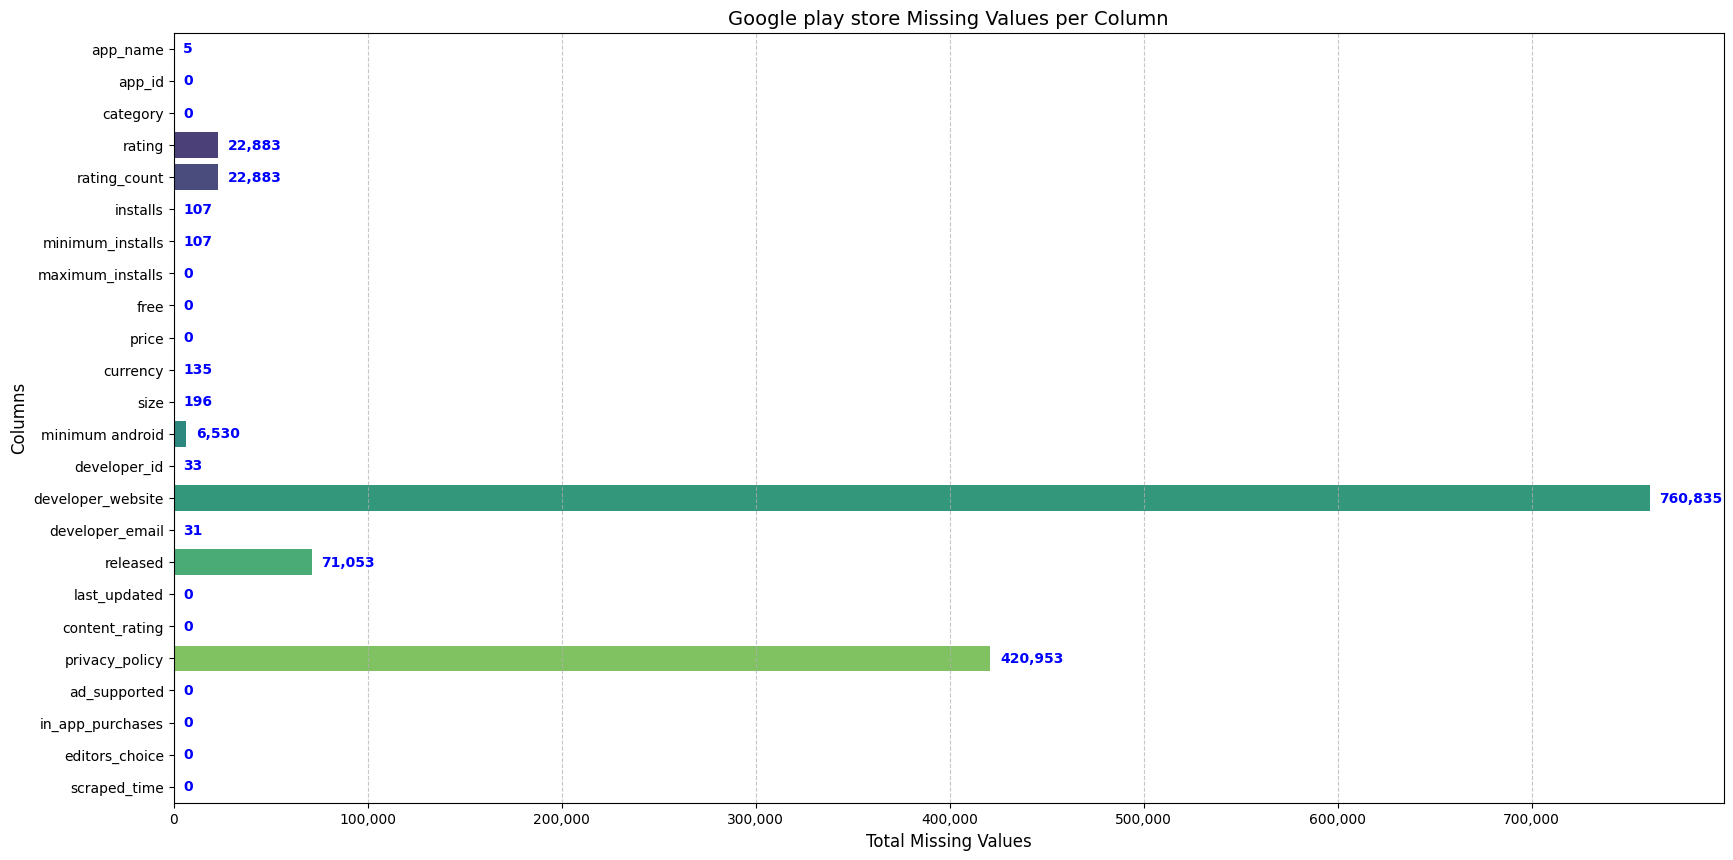

In [ ]:
import matplotlib.ticker as mtick
# Set figure size
plt.figure(figsize=(20, 10))

# Create barplot
ax = sns.barplot(x="total_missing", y="columns", data=missing_df, palette="viridis")

# Add exact values to the bars
for index, value in enumerate(missing_df["total_missing"]):
    plt.text(value + 5000, index, f"{value:,}", va='center', fontsize=10, color='blue', weight='bold')

# Format x-axis to show exact values
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Set labels and title
plt.xlabel("Total Missing Values", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.title("Google play store Missing Values per Column", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:
#Droping all the rows, app with missing values
cleaned_df = df.dropna().reset_index(drop=True)

#### DATA CLEANING - INVALID DATA TYPES - GOOGLE PLAY STORE

In [ ]:
cleaned_df['scraped_time'] = pd.to_datetime(cleaned_df['scraped_time'])
cleaned_df['last_updated'] = pd.to_datetime(cleaned_df['last_updated'])
cleaned_df['released'] = pd.to_datetime(cleaned_df['released'])

### DATA CLEANING - DUPLICATE

In [ ]:
#checking for duplicate in the dataset
print("Number of duplicate rows:", cleaned_df.duplicated(keep='first').sum())

Number of duplicate rows: 0


#### DATA EXPLORATION - AFTER CLEANING

In [ ]:
#Total rows and columns in the dataset
cleaned_df.shape

(1287191, 24)

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287191 entries, 0 to 1287190
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   app_name           1287191 non-null  object        
 1   app_id             1287191 non-null  object        
 2   category           1287191 non-null  object        
 3   rating             1287191 non-null  float64       
 4   rating_count       1287191 non-null  float64       
 5   installs           1287191 non-null  object        
 6   minimum_installs   1287191 non-null  float64       
 7   maximum_installs   1287191 non-null  int64         
 8   free               1287191 non-null  bool          
 9   price              1287191 non-null  float64       
 10  currency           1287191 non-null  object        
 11  size               1287191 non-null  object        
 12  minimum android    1287191 non-null  object        
 13  developer_id       1287191 

In [ ]:
cleaned_df.head()

,app_name,app_id,category,rating,rating_count,installs,minimum_installs,maximum_installs,free,price,...,developer_website,developer_email,released,last_updated,content_rating,privacy_policy,ad_supported,in_app_purchases,editors_choice,scraped_time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
3,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,2018-12-24,2019-12-20,Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
4,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,2019-09-22,2020-10-07,Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [ ]:
#statistical view of the numerical columns in the dataset
cleaned_df.describe()

,rating,rating_count,minimum_installs,maximum_installs,price,released,last_updated,scraped_time
count,1.287191e+06,1.287191e+06,1.287191e+06,1.287191e+06,1.287191e+06,1287191,1287191,1287191
mean,2.315500e+00,4.470702e+03,2.691305e+05,4.676076e+05,1.099716e-01,2018-06-01 08:55:30.325336064,2020-01-29 15:09:14.342906368,2021-06-16 05:19:30.463230720
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2010-01-28 00:00:00,2009-02-09 00:00:00,2021-06-15 20:19:35
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.150000e+02,0.000000e+00,2017-03-15 00:00:00,2019-06-25 00:00:00,2021-06-16 01:01:52
50%,3.300000e+00,7.000000e+00,5.000000e+02,9.490000e+02,0.000000e+00,2018-11-30 00:00:00,2020-07-09 00:00:00,2021-06-16 05:20:05
75%,4.300000e+00,6.100000e+01,1.000000e+04,1.074300e+04,0.000000e+00,2020-02-17 00:00:00,2021-03-05 00:00:00,2021-06-16 09:38:33
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,2021-06-15 00:00:00,2021-06-16 00:00:00,2021-06-16 15:10:42
std,2.090373e+00,2.594790e+05,1.834388e+07,2.780474e+07,2.438043e+00,NaN,NaN,NaN


In [ ]:
#taking a quick view of the cardinality of each dataframe
print('cleaned_df', '\n', cleaned_df.select_dtypes('object').nunique())

cleaned_df 
 app_name             1245508
app_id               1287191
category                  48
installs                  22
currency                   8
size                    1563
minimum android          106
developer_id          452401
developer_website     659753
developer_email       561767
content_rating             6
privacy_policy        701772
dtype: int64


In [ ]:
#saving the dataset to a CSV file
cleaned_df.to_csv('cleandata1.csv', index= False)

## EXTERNAL DATASET SOURCE FROM KAGGLE

In [ ]:
#reading the dataset into a pandas dataframe
df =pd.read_csv('/content/drive/MyDrive/googleplaystore 2 - googleplaystore 2.csv (1).csv')

#### DATA EXPLORATION - BEFORE CLEANING

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#taking a quick view of the cardinality of each dataframe
print('df', '\n', df.select_dtypes('object').nunique())

df 
 App               9660
Category            34
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2784
Android Ver         33
dtype: int64


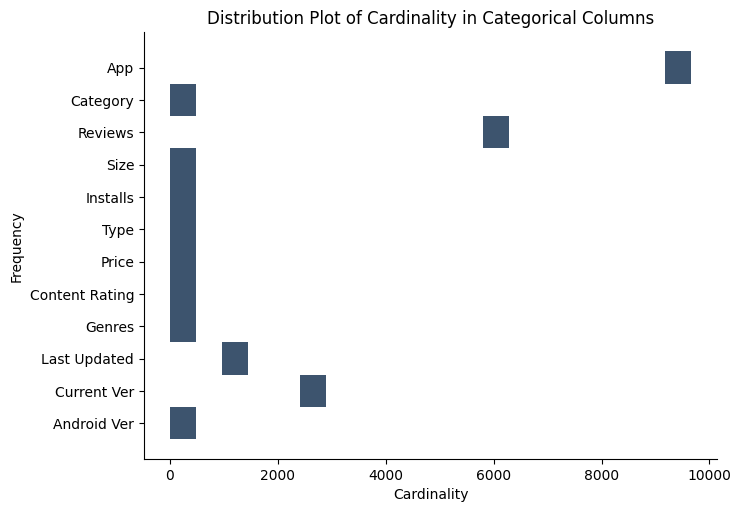

In [ ]:
# Cardinality data
cardinality = {
    "App": 9660,
    "Category": 34,
    "Reviews": 6002,
    "Size": 462,
    "Installs": 22,
    "Type": 3,
    "Price": 93,
    "Content Rating": 6,
    "Genres": 120,
    "Last Updated": 1378,
    "Current Ver": 2784,
    "Android Ver": 33
}

# Convert to DataFrame
df_cardinality = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Cardinality'])

# Plot
sns.displot(x='Cardinality', y='Column', data=df_cardinality, bins=20, height=5, aspect=1.5)


# Labels and Title
plt.xlabel("Cardinality")
plt.ylabel("Frequency")
plt.title("Distribution Plot of Cardinality in Categorical Columns")

plt.show()

#### DATA CLEANING - Standardizing Data Column

In [ ]:
# Store old column names
old_columns = df.columns.tolist()

In [ ]:
df.columns = df.columns.str.lower().str.replace('content rating', 'content_rating') \
                         .str.replace('last updated', 'last_updated') \
                         .str.replace('current ver', 'current_ver') \
                         .str.replace('android ver', 'android_ver')

In [ ]:
# Store new column names
new_columns = df.columns.tolist()

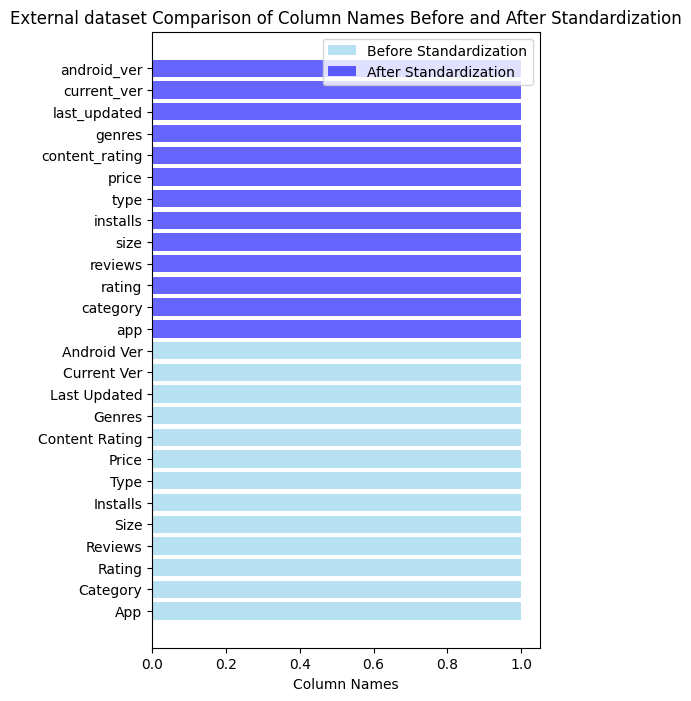

In [ ]:
# Plotting
plt.figure(figsize=(5, 8))

# Before and after plot
plt.barh(old_columns, [1] * len(old_columns), color='skyblue', alpha=0.6, label='Before Standardization')
plt.barh(new_columns, [1] * len(new_columns), color='blue', alpha=0.6, label='After Standardization')

plt.xlabel('Column Names')
plt.title('External dataset Comparison of Column Names Before and After Standardization')
plt.legend(loc='upper right')

plt.show()

#### DATA CLEANING - missing values

In [ ]:
#Checking the number of null values in the dataset
missing_values = {col: df[col].isna().sum() for col in df.columns}

# Convert to DataFrame
missing_df = pd.DataFrame(list(missing_values.items()), columns=['columns', 'total_missing'])

# Display the DataFrame
print(missing_df)

           columns  total_missing
0              app              0
1         category              0
2           rating           1474
3          reviews              0
4             size              0
5         installs              0
6             type              1
7            price              0
8   content_rating              1
9           genres              0
10    last_updated              0
11     current_ver              8
12     android_ver              3


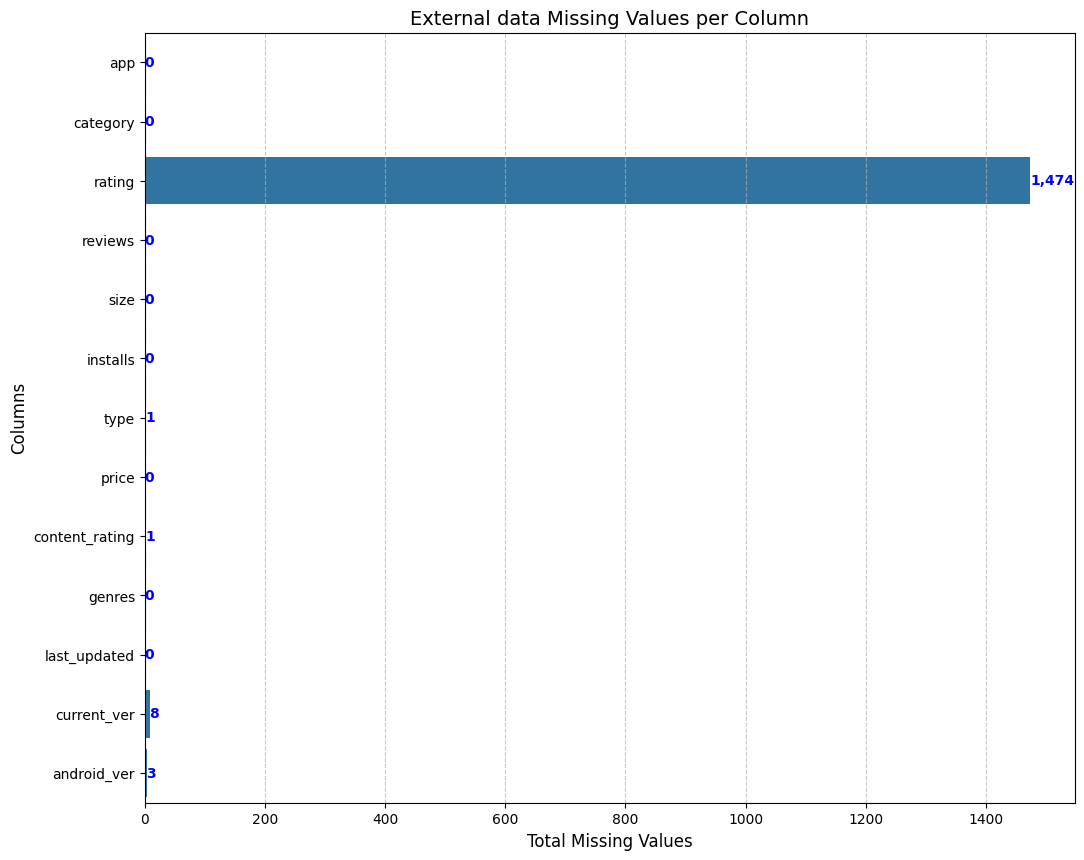

In [ ]:
import matplotlib.ticker as mtick
# Set figure size
plt.figure(figsize=(12, 10))

# Create barplot
ax = sns.barplot(x="total_missing", y="columns", data=missing_df)

# Add exact values to the bars
for index, value in enumerate(missing_df["total_missing"]):
    plt.text(value, index, f"{value:,}", va='center', fontsize=10, color='blue', weight='bold')


# Set labels and title
plt.xlabel("Total Missing Values", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.title("External data Missing Values per Column", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:
#importing the requirements needed for the data analysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

In [ ]:
# Drop rows with missing values and reset the index
df1 = df.dropna().reset_index(drop=True)

# Define target and features
y = df1['rating']
X = df1.drop(['rating'], axis=1)

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for categorical data
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Create and compile the pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data and fitting the model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data and making predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.41804059829059836


In [ ]:
#dropping the rows with missing values and reseting the index
cleaned_df = df.dropna().reset_index(drop=True)

#### DATA CLEANING - INVALID DATA TYPES

In [ ]:
cleaned_df[['reviews', 'price', 'last_updated']]

,reviews,price,last_updated
0,159,0,"January 7, 2018"
1,967,0,"January 15, 2018"
2,87510,0,"August 1, 2018"
3,215644,0,"June 8, 2018"
4,967,0,"June 20, 2018"
...,...,...,...
9355,7,0,"June 18, 2017"
9356,38,0,"July 25, 2017"
9357,4,0,"July 6, 2018"
9358,114,0,"January 19, 2015"


In [ ]:
#coverting reviews from object to a numerical data type
cleaned_df['reviews'] = pd.to_numeric(cleaned_df['reviews'])

#converting price column from object(due to $, space, and commas) to float
cleaned_df['price'] = cleaned_df['price'].replace({'\$': '', ',': ''},
                            regex=True).str.strip().astype(np.float64).astype(np.float64)
#converting last_updated to datetime
cleaned_df['last_updated'] = pd.to_datetime(cleaned_df['last_updated'])

#### DATA CLEANING - DUPLICATE

In [ ]:
#checking for duplicate in the dataset
print("Number of duplicate rows:", cleaned_df.duplicated(keep='first').sum())

Number of duplicate rows: 474


In [ ]:
#dropping the duplicated rows in the dataframe
duplicate_rows = cleaned_df[cleaned_df.duplicated(keep='first')]

In [ ]:
duplicate_rows

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
217,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
224,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
227,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
244,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
249,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device
7642,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
7646,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device
8776,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up


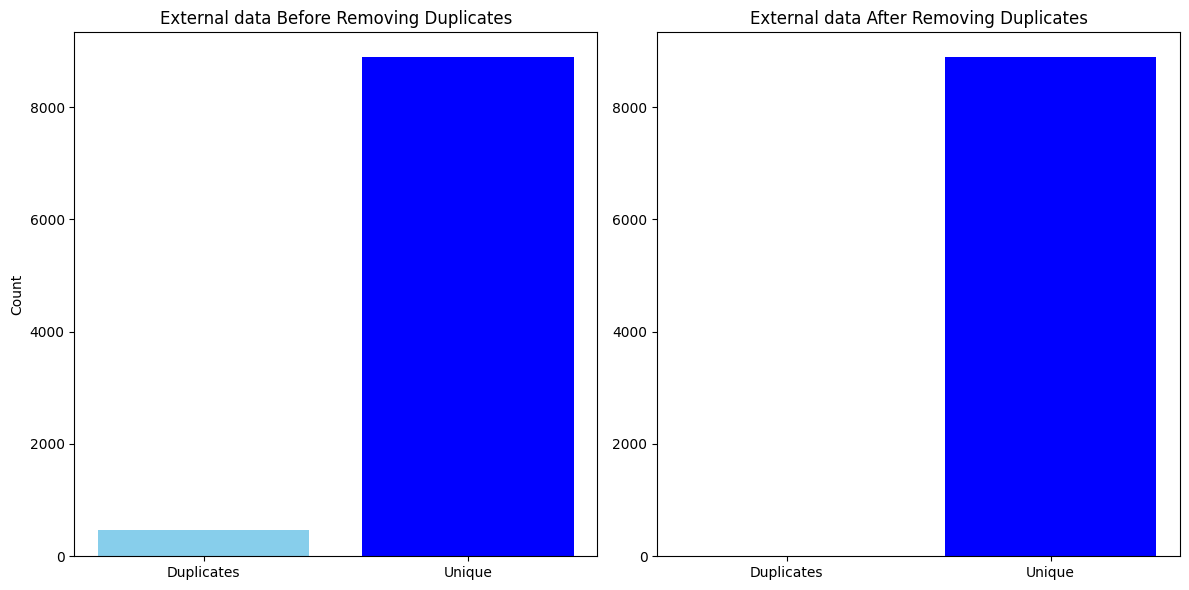

In [ ]:
# Count before removing duplicates
duplicates_before = cleaned_df.duplicated(keep='first').sum()
unique_before = len(cleaned_df) - duplicates_before

# Remove duplicates
cleaned_df.drop_duplicates(keep='first', inplace=True)

# Count after removing duplicates
duplicates_after = cleaned_df.duplicated(keep='first').sum()
unique_after = len(cleaned_df) - duplicates_after

# Plotting the comparison
labels = ['Duplicates', 'Unique']
before_counts = [duplicates_before, unique_before]
after_counts = [duplicates_after, unique_after]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Before removal
ax[0].bar(labels, before_counts, color=['skyblue', 'blue'])
ax[0].set_title('External data Before Removing Duplicates')
ax[0].set_ylabel('Count')

# After removal
ax[1].bar(labels, after_counts, color=['skyblue', 'blue'])
ax[1].set_title('External data After Removing Duplicates')

plt.tight_layout()
plt.show()

In [ ]:
duplicate_rows = cleaned_df[cleaned_df.duplicated(keep='first')]
duplicate_rows

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver


In [ ]:
#reseting index after removing duplicate
cleaned_df = cleaned_df.reset_index(drop=True)

#### DATA EXPLORATION - after cleaning

In [ ]:
cleaned_df.shape

(8886, 13)

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             8886 non-null   object        
 1   category        8886 non-null   object        
 2   rating          8886 non-null   float64       
 3   reviews         8886 non-null   int64         
 4   size            8886 non-null   object        
 5   installs        8886 non-null   object        
 6   type            8886 non-null   object        
 7   price           8886 non-null   float64       
 8   content_rating  8886 non-null   object        
 9   genres          8886 non-null   object        
 10  last_updated    8886 non-null   datetime64[ns]
 11  current_ver     8886 non-null   object        
 12  android_ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 902.6+ KB


In [ ]:
cleaned_df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
cleaned_df.describe()

,rating,reviews,price,last_updated
count,8886.000000,8.886000e+03,8886.000000,8886
mean,4.187959,4.730928e+05,0.963526,2017-11-22 00:29:00.445644800
min,1.000000,1.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,1.640000e+02,0.000000,2017-09-21 00:00:00
50%,4.300000,4.723000e+03,0.000000,2018-05-28 00:00:00
75%,4.500000,7.131325e+04,0.000000,2018-07-23 00:00:00
max,5.000000,7.815831e+07,400.000000,2018-08-08 00:00:00
std,0.522428,2.906007e+06,16.194792,NaN


In [ ]:
#taking a quick view of the cardinality of each dataframe
print('cleaned_df', '\n', cleaned_df.select_dtypes('object').nunique())

cleaned_df 
 app               8190
category            33
size               413
installs            19
type                 2
content_rating       6
genres             115
current_ver       2594
android_ver         31
dtype: int64


In [ ]:
#saving the second cleaned dataset to a csv file
cleaned_df.to_csv('cleandata2.csv', index= False)

# INTEGRETING THE TWO DATASET

In [ ]:
#reading the cleaned task dataset(first dataset) into a pandas dataframe
df2 = pd.read_csv('/content/drive/MyDrive/cleandata1.csv', index_col=False)

In [ ]:
#running a quick EDA to ensure everything is in place
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287191 entries, 0 to 1287190
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   app_name           1287191 non-null  object 
 1   app_id             1287191 non-null  object 
 2   category           1287191 non-null  object 
 3   rating             1287191 non-null  float64
 4   rating_count       1287191 non-null  float64
 5   installs           1287191 non-null  object 
 6   minimum_installs   1287191 non-null  float64
 7   maximum_installs   1287191 non-null  int64  
 8   free               1287191 non-null  bool   
 9   price              1287191 non-null  float64
 10  currency           1287191 non-null  object 
 11  size               1287191 non-null  object 
 12  minimum android    1287191 non-null  object 
 13  developer_id       1287191 non-null  object 
 14  developer_website  1287191 non-null  object 
 15  developer_email    1287191 non-n

In [ ]:
# Get unique categories before standardization
categories_before = cleaned_df.category.unique()

In [ ]:
#creating a value counts of the unique category in the first dataset and savng to a csv file to view and understand better
a = df2.category.value_counts().sort_index()
a.to_csv('category1.csv')

In [ ]:
#creating a value counts of the unique category in the external dataset and savng to a csv file to view and understand better
b = cleaned_df.category.value_counts().sort_index()
b.to_csv('category2.csv')

In [ ]:
#dropping category rows that contains family and game from the external dataset as they are not present in the first dataset
cond = cleaned_df['category'].isin(['FAMILY', 'GAME'])
cleaned_df = cleaned_df.drop(cleaned_df[cond].index)

In [ ]:
#converting the category rows in the external dataset to lowercase and replace _and_ with & to maintain consistency in the two dataset
cleaned_df.category = cleaned_df.category.str.lower().str.replace('_and_', ' & ')

In [ ]:
#maintaining constiency in the two dataset
cleaned_df.category = cleaned_df.category.str.replace('video_players', 'Video Players & Editors')

In [ ]:
#quickly checking that the unique values in the external dataset now match with the unique values in the first dataset
cleaned_df.category.value_counts().sort_index()

,count
category,
Video Players & Editors,160
art & design,61
auto & vehicles,73
beauty,42
books & reference,177
business,270
comics,58
communication,307
dating,159


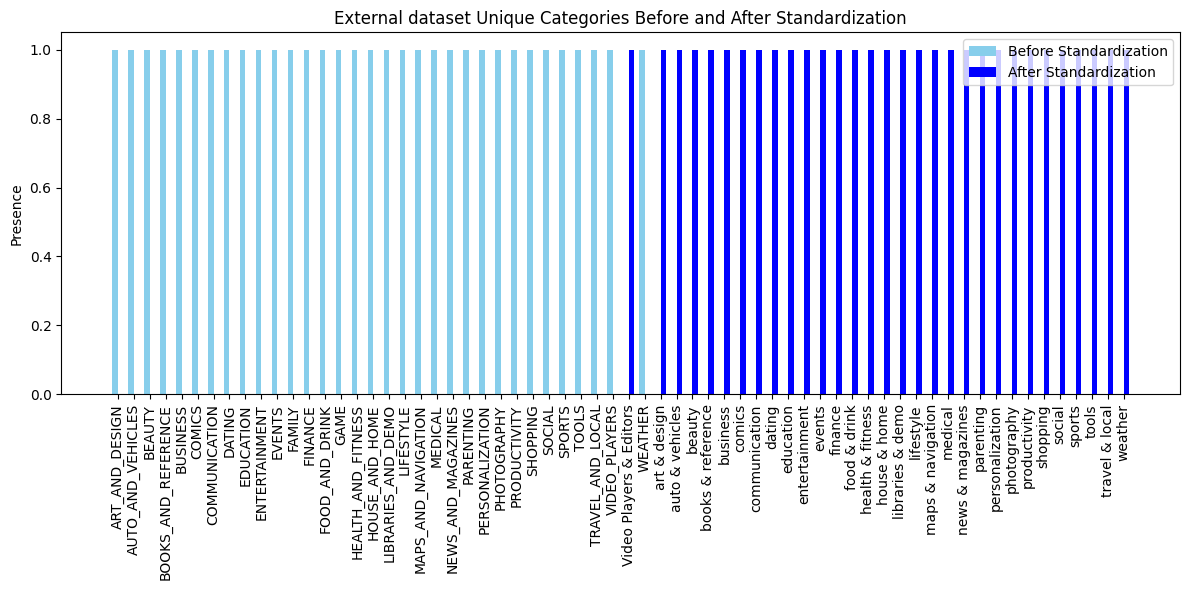

In [ ]:
# Get unique categories after standardization
categories_after = cleaned_df.category.unique()

# Create sets of categories for comparison
before_set = set(categories_before)
after_set = set(categories_after)

# Find common and unique categories
common_categories = before_set.intersection(after_set)
before_unique = before_set.difference(after_set)
after_unique = after_set.difference(before_set)

# Prepare data for plotting
all_categories = sorted(list(before_set.union(after_set)))
before_counts = [1 if cat in before_set else 0 for cat in all_categories]
after_counts = [1 if cat in after_set else 0 for cat in all_categories]

# Create the bar plot
x = np.arange(len(all_categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed
rects1 = ax.bar(x - width/2, before_counts, width, label='Before Standardization', color='skyblue')
rects2 = ax.bar(x + width/2, after_counts, width, label='After Standardization', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Presence')
ax.set_title('External dataset Unique Categories Before and After Standardization')
ax.set_xticks(x)
ax.set_xticklabels(all_categories, rotation=90)  # Rotate x-axis labels
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Get unique categories before standardization
categories_before = df2.category.unique()

In [ ]:
#converting the category rows in the task data set to lowercase
df2.category = df2.category.str.lower()

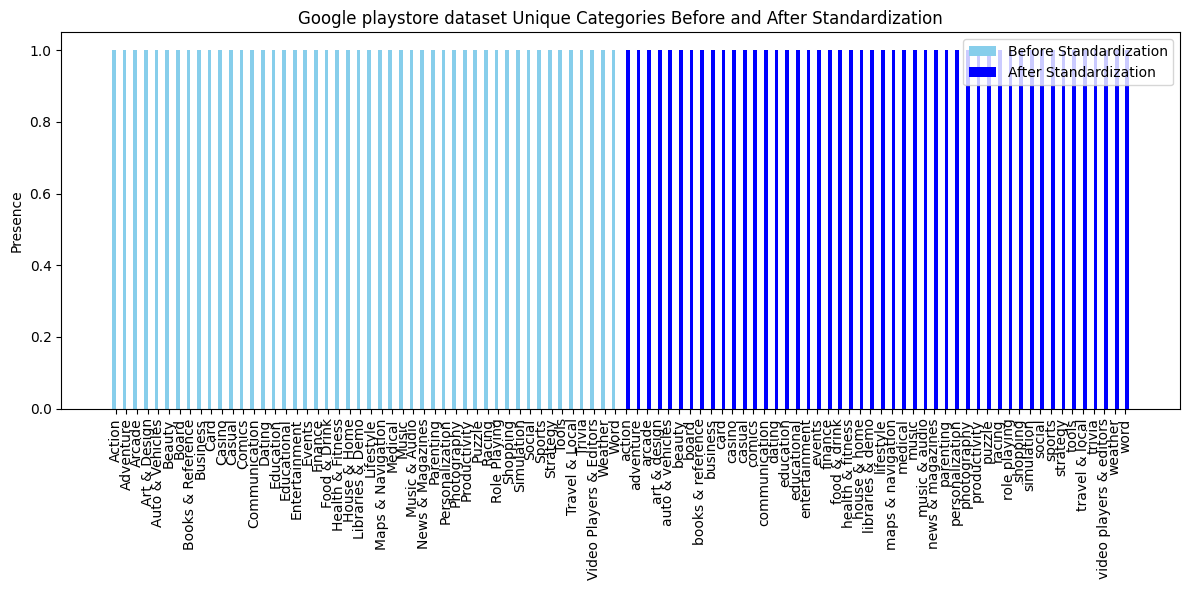

In [ ]:
# Get unique categories after standardization
categories_after = df2.category.unique()

# Create sets of categories for comparison
before_set = set(categories_before)
after_set = set(categories_after)

# Find common and unique categories
common_categories = before_set.intersection(after_set)
before_unique = before_set.difference(after_set)
after_unique = after_set.difference(before_set)

# Prepare data for plotting
all_categories = sorted(list(before_set.union(after_set)))
before_counts = [1 if cat in before_set else 0 for cat in all_categories]
after_counts = [1 if cat in after_set else 0 for cat in all_categories]

# Create the bar plot
x = np.arange(len(all_categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed
rects1 = ax.bar(x - width/2, before_counts, width, label='Before Standardization', color='skyblue')
rects2 = ax.bar(x + width/2, after_counts, width, label='After Standardization', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Presence')
ax.set_title('Google playstore dataset Unique Categories Before and After Standardization')
ax.set_xticks(x)
ax.set_xticklabels(all_categories, rotation=90)  # Rotate x-axis labels
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#comparing it category with the external dataset
df2.category.value_counts().sort_index()

,count
category,
action,12385
adventure,10295
arcade,19925
art & design,8007
auto & vehicles,10744
beauty,6179
board,5175
books & reference,56515
business,100311


In [ ]:
#feature engineering: average reviews per category
cleaned_df['average_reviews_per_cat']  = cleaned_df.groupby('category')['reviews'].transform('mean').astype(int)

In [ ]:
#extract the category and average reviews, dropping duplicates to form a new dataset for the merging
new_df = cleaned_df[['category', 'average_reviews_per_cat']].drop_duplicates()

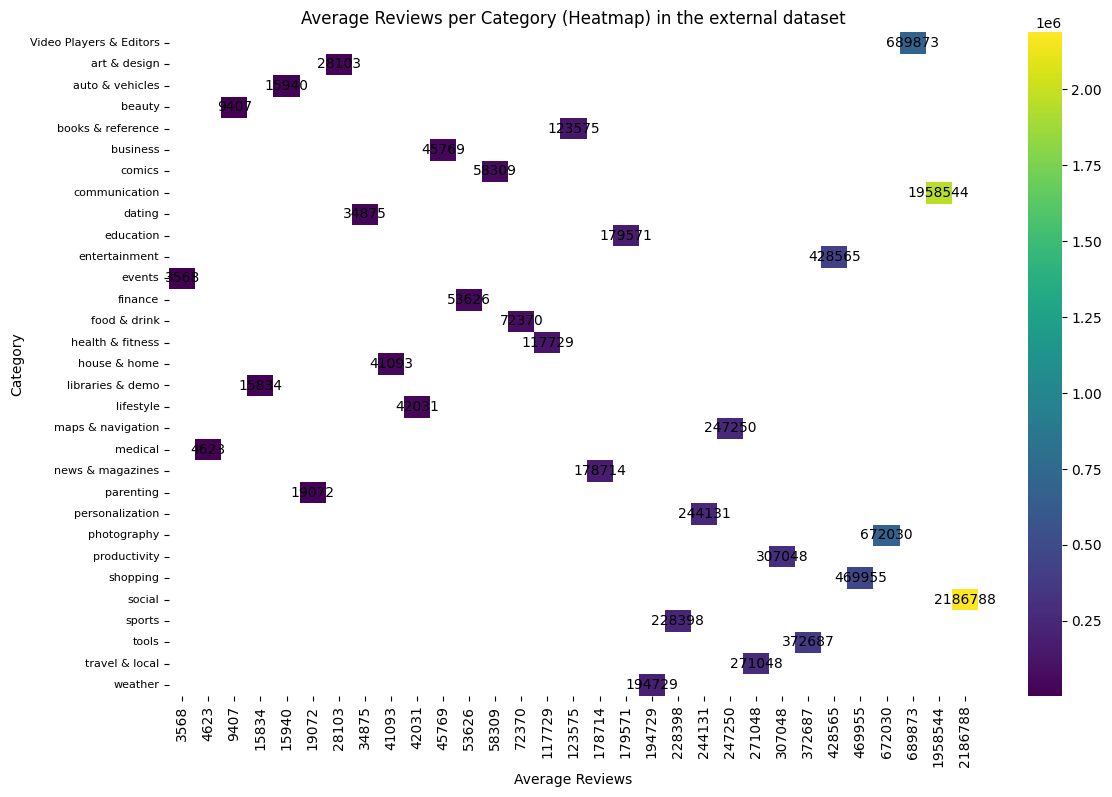

In [ ]:
# Pivot the data to create a matrix for the heatmap
heatmap_data = new_df.pivot(index='category', columns='average_reviews_per_cat', values='average_reviews_per_cat')

# Create the heatmap with black text
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
ax = sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="viridis", annot_kws={"color": "black"})

# *** Adjustments to display all values ***
plt.yticks(rotation=0)  # Ensure y-axis (category) labels are horizontal
plt.xticks(rotation=90)  # Rotate x-axis (avg reviews) labels vertically if necessary
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust font size of yticklabels
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
# **************************************

plt.title("Average Reviews per Category (Heatmap) in the external dataset")
plt.xlabel("Average Reviews")
plt.ylabel("Category")
plt.show()

In [ ]:
#a quick view on the new data frame
new_df

,category,average_reviews_per_cat
0,art & design,28103
47,auto & vehicles,15940
96,beauty,9407
131,books & reference,123575
176,business,45769
285,comics,58309
322,communication,1958544
463,dating,34875
647,education,179571
802,entertainment,428565


In [ ]:
#checking the new dataframe properties
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 3666
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   category                 31 non-null     object
 1   average_reviews_per_cat  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 744.0+ bytes


In [ ]:
#merging the task dataset with average reviews per category on category.
merged_df = df2.merge(new_df, on='category', how='left')

In [ ]:
#a quick view of the properties where we notice null values in the last column
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287191 entries, 0 to 1287190
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   app_name                 1287191 non-null  object 
 1   app_id                   1287191 non-null  object 
 2   category                 1287191 non-null  object 
 3   rating                   1287191 non-null  float64
 4   rating_count             1287191 non-null  float64
 5   installs                 1287191 non-null  object 
 6   minimum_installs         1287191 non-null  float64
 7   maximum_installs         1287191 non-null  int64  
 8   free                     1287191 non-null  bool   
 9   price                    1287191 non-null  float64
 10  currency                 1287191 non-null  object 
 11  size                     1287191 non-null  object 
 12  minimum android          1287191 non-null  object 
 13  developer_id             1287191 non-null 

In [ ]:
#checking for null values in the new columns -
merged_df.average_reviews_per_cat.isnull().sum()

250268

In [ ]:
#filling those categories with 0, as we do not know their average_reviews_per_category
merged_df['average_reviews_per_cat'] = merged_df['average_reviews_per_cat'].fillna(0)

In [ ]:
#due to the reading from CSV file, we lost our datetime format, adding it back
merged_df['scraped_time'] = pd.to_datetime(merged_df['scraped_time'])
merged_df['last_updated'] = pd.to_datetime(merged_df['last_updated'])
merged_df['released'] = pd.to_datetime(merged_df['released'])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287191 entries, 0 to 1287190
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   app_name                 1287191 non-null  object        
 1   app_id                   1287191 non-null  object        
 2   category                 1287191 non-null  object        
 3   rating                   1287191 non-null  float64       
 4   rating_count             1287191 non-null  float64       
 5   installs                 1287191 non-null  object        
 6   minimum_installs         1287191 non-null  float64       
 7   maximum_installs         1287191 non-null  int64         
 8   free                     1287191 non-null  bool          
 9   price                    1287191 non-null  float64       
 10  currency                 1287191 non-null  object        
 11  size                     1287191 non-null  object        
 12  

## FEATURE ENGINEERING ON DATE TIME COLUMNS

In [ ]:
# Extract date-based numerical features
merged_df['release_year'] = merged_df['released'].dt.year
merged_df['release_month'] = merged_df['released'].dt.month
merged_df['last_updated_year'] = merged_df['last_updated'].dt.year
merged_df['last_updated_month'] = merged_df['last_updated'].dt.month

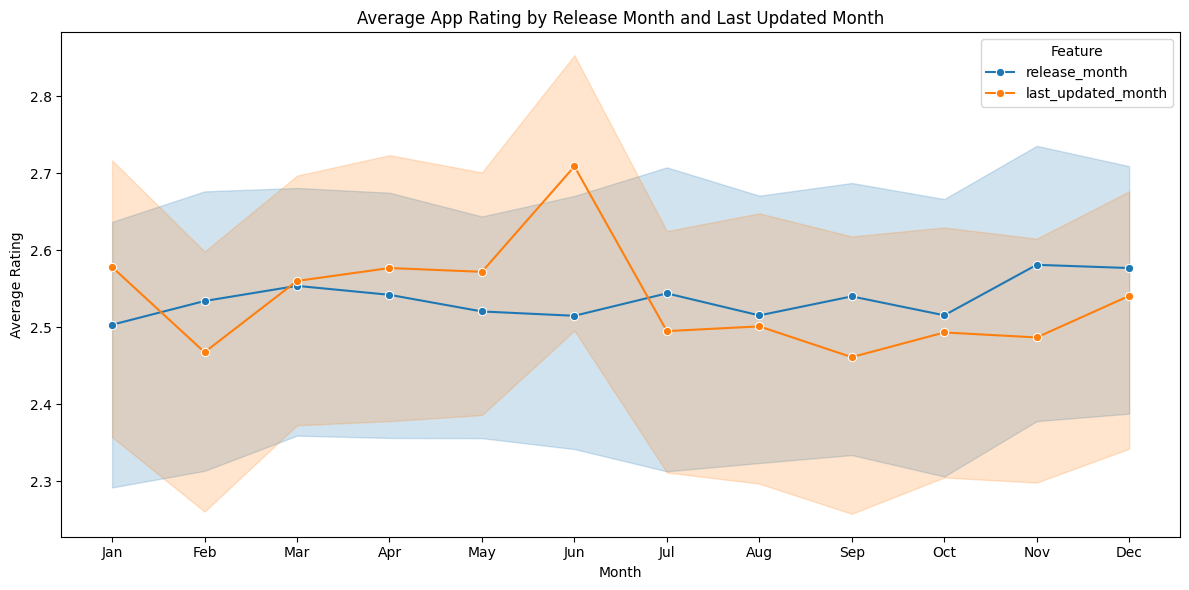

In [ ]:
# Filter data for monthly features
monthly_data = merged_df[['release_month', 'last_updated_month', 'rating']]

# Group by month and calculate average rating
average_rating_by_month = monthly_data.groupby(['release_month', 'last_updated_month'])['rating'].mean().reset_index()

# Melt the data to have a single 'Month' column
melted_monthly_data = pd.melt(average_rating_by_month, id_vars=['rating'],
                               value_vars=['release_month', 'last_updated_month'],
                               var_name='Feature', value_name='Month')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='rating', hue='Feature', data=melted_monthly_data, marker='o')

# Customize the plot
plt.title('Average App Rating by Release Month and Last Updated Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Feature')

plt.tight_layout()
plt.show()

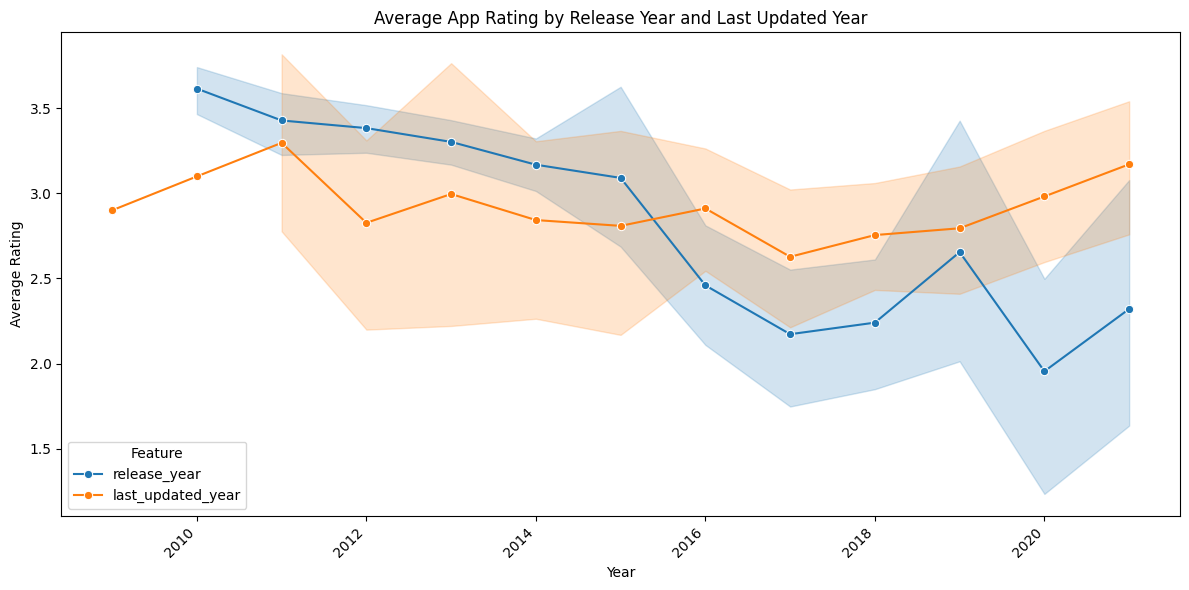

In [ ]:
# Filter data for yearly features
yearly_data = merged_df[['release_year', 'last_updated_year', 'rating']]

# Group by year and calculate average rating
average_rating_by_year = yearly_data.groupby(['release_year', 'last_updated_year'])['rating'].mean().reset_index()

# Melt the data to have a single 'Year' column
melted_yearly_data = pd.melt(average_rating_by_year, id_vars=['rating'],
                               value_vars=['release_year', 'last_updated_year'],
                               var_name='Feature', value_name='Year')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='rating', hue='Feature', data=melted_yearly_data, marker='o')

# Customize the plot
plt.title('Average App Rating by Release Year and Last Updated Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Feature')

plt.tight_layout()
plt.show()

action, adventure, arcade, board, card, casino, casual, educational, music, music and audio, puzzle, racing, role playing, simulation, strategy, trivia, word. does not exist in the external dataset category column and as such we do not have their average reviews per category

## DATA EXPOLARATION - AFTER MERGING AND FEATURE ENGINEERING

In [ ]:
merged_df.shape

(1287191, 29)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287191 entries, 0 to 1287190
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   app_name                 1287191 non-null  object        
 1   app_id                   1287191 non-null  object        
 2   category                 1287191 non-null  object        
 3   rating                   1287191 non-null  float64       
 4   rating_count             1287191 non-null  float64       
 5   installs                 1287191 non-null  object        
 6   minimum_installs         1287191 non-null  float64       
 7   maximum_installs         1287191 non-null  int64         
 8   free                     1287191 non-null  bool          
 9   price                    1287191 non-null  float64       
 10  currency                 1287191 non-null  object        
 11  size                     1287191 non-null  object        
 12  

In [ ]:
#first 5 rows
merged_df.head()

,app_name,app_id,category,rating,rating_count,installs,minimum_installs,maximum_installs,free,price,...,privacy_policy,ad_supported,in_app_purchases,editors_choice,scraped_time,average_reviews_per_cat,release_year,release_month,last_updated_year,last_updated_month
0,Gakondo,com.ishakwe.gakondo,adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,0.0,2020,2,2020,2
1,Ampere Battery Info,com.webserveis.batteryinfo,tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,372687.0,2020,5,2021,5
2,GROW.me,com.horodyski.grower,tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,372687.0,2020,2,2018,11
3,IMOCCI,com.imocci,social,0.0,0.0,50+,50.0,89,True,0.0,...,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35,2186788.0,2018,12,2019,12
4,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35,244131.0,2019,9,2020,10


In [ ]:
#statistical view of the numerical columns in the dataset
merged_df.describe()

,rating,rating_count,minimum_installs,maximum_installs,price,released,last_updated,scraped_time,average_reviews_per_cat,release_year,release_month,last_updated_year,last_updated_month
count,1.287191e+06,1.287191e+06,1.287191e+06,1.287191e+06,1.287191e+06,1287191,1287191,1287191,1.287191e+06,1.287191e+06,1.287191e+06,1.287191e+06,1.287191e+06
mean,2.315500e+00,4.470702e+03,2.691305e+05,4.676076e+05,1.099716e-01,2018-06-01 08:55:30.325336064,2020-01-29 15:09:14.342906368,2021-06-16 05:19:30.463230720,2.405434e+05,2.017920e+03,6.471493e+00,2.019613e+03,6.116608e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2010-01-28 00:00:00,2009-02-09 00:00:00,2021-06-15 20:19:35,0.000000e+00,2.010000e+03,1.000000e+00,2.009000e+03,1.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.150000e+02,0.000000e+00,2017-03-15 00:00:00,2019-06-25 00:00:00,2021-06-16 01:01:52,4.203100e+04,2.017000e+03,4.000000e+00,2.019000e+03,4.000000e+00
50%,3.300000e+00,7.000000e+00,5.000000e+02,9.490000e+02,0.000000e+00,2018-11-30 00:00:00,2020-07-09 00:00:00,2021-06-16 05:20:05,1.235750e+05,2.018000e+03,6.000000e+00,2.020000e+03,6.000000e+00
75%,4.300000e+00,6.100000e+01,1.000000e+04,1.074300e+04,0.000000e+00,2020-02-17 00:00:00,2021-03-05 00:00:00,2021-06-16 09:38:33,2.710480e+05,2.020000e+03,9.000000e+00,2.021000e+03,9.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,2021-06-15 00:00:00,2021-06-16 00:00:00,2021-06-16 15:10:42,2.186788e+06,2.021000e+03,1.200000e+01,2.021000e+03,1.200000e+01
std,2.090373e+00,2.594790e+05,1.834388e+07,2.780474e+07,2.438043e+00,NaN,NaN,NaN,4.252204e+05,2.202709e+00,3.426915e+00,1.478150e+00,3.270459e+00


In [ ]:
#taking a quick view of the cardinality of each dataframe
print('merged_df', '\n', merged_df.select_dtypes('object').nunique())

merged_df 
 app_name             1245508
app_id               1287191
category                  48
installs                  22
currency                   8
size                    1563
minimum android          106
developer_id          452401
developer_website     659753
developer_email       561767
content_rating             6
privacy_policy        701772
dtype: int64


## DEFINING 10 UNIQUE KPI'S

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287191 entries, 0 to 1287190
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   app_name                 1287191 non-null  object        
 1   app_id                   1287191 non-null  object        
 2   category                 1287191 non-null  object        
 3   rating                   1287191 non-null  float64       
 4   rating_count             1287191 non-null  float64       
 5   installs                 1287191 non-null  object        
 6   minimum_installs         1287191 non-null  float64       
 7   maximum_installs         1287191 non-null  int64         
 8   free                     1287191 non-null  bool          
 9   price                    1287191 non-null  float64       
 10  currency                 1287191 non-null  object        
 11  size                     1287191 non-null  object        
 12  

In [ ]:
#mutual information of the relationship between numerical features and app rating
from sklearn.feature_selection import mutual_info_regression

numeric_col = merged_df.select_dtypes(include=['int32', 'int64', 'float64']).columns
X = merged_df[numeric_col].drop('rating', axis=1)
y = merged_df['rating']

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_result = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_result)

rating_count               0.767720
maximum_installs           0.449189
minimum_installs           0.435291
release_year               0.048270
average_reviews_per_cat    0.040897
last_updated_year          0.010479
last_updated_month         0.001799
release_month              0.000761
price                      0.000675
dtype: float64


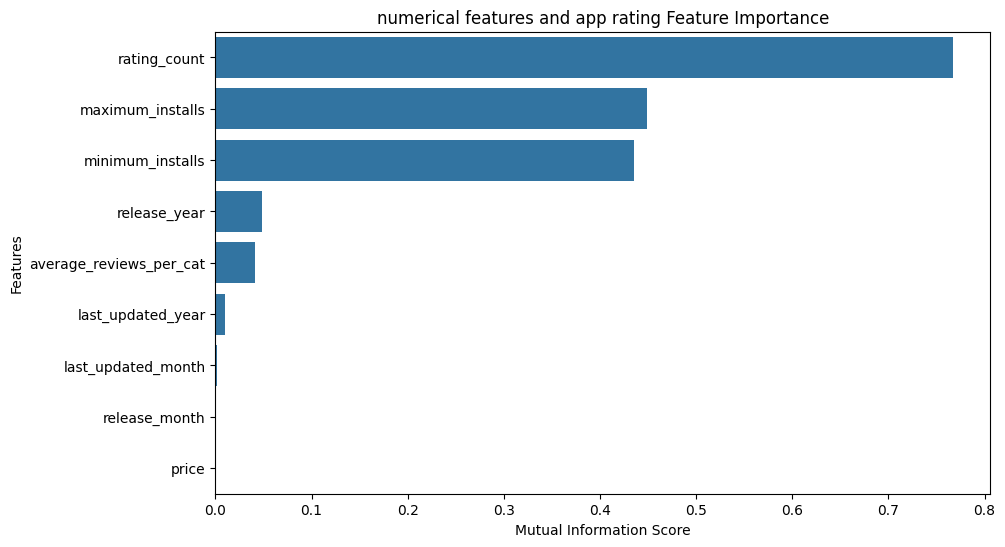

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_result.values, y=mi_result.index)

# Add labels and title
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("numerical features and app rating Feature Importance")

#adding the figure to your system
fig2 = plt.gcf()
fig2.savefig('MI.png')
plt.show()

In [ ]:
#mutual information of the relationship between categorical features and in_app_purchase
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

#definng the low cardinality columns to be used
low_cardinality_cols = [cname for cname in merged_df.columns
                        if merged_df[cname].nunique() < 50 and merged_df[cname].dtype in ['object', 'bool']]

X = merged_df[low_cardinality_cols].drop('in_app_purchases', axis=1)
X = X.apply(LabelEncoder().fit_transform)  # Convert categorical to numeric
y = merged_df['in_app_purchases']

mi_scores = mutual_info_classif(X, y, random_state=0)
mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_results)

currency          0.208921
content_rating    0.180131
free              0.173930
ad_supported      0.123080
installs          0.064866
category          0.056714
editors_choice    0.000570
dtype: float64


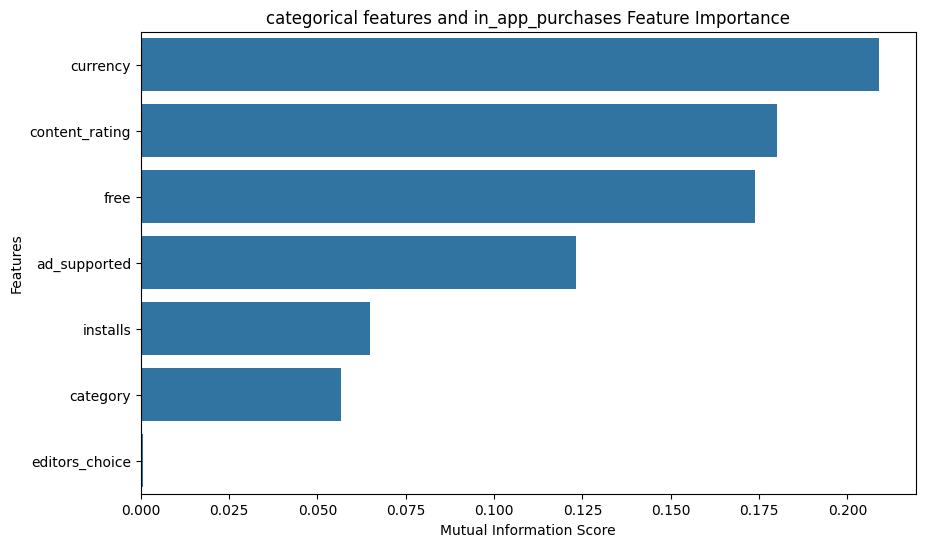

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_results.values, y=mi_results.index)

# Add labels and title
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("categorical features and in_app_purchases Feature Importance")

#adding the figure to your system
fig2 = plt.gcf()
fig2.savefig('MI-2.png')
plt.show()

In [ ]:
merged_df.to_csv('mergedgoogle.csv')

## CONDUCTING PREDICTIVE ANALYSIS ON RATING - USING RANDOM FOREST REGRESSOR

In [ ]:
#select low cardinality cols to be used
categorical_cols = [cname for cname in merged_df.columns
                        if merged_df[cname].nunique() < 50 and merged_df[cname].dtype in ['object', 'bool']]

#defining the numerical columns
numerical_cols = [cname for cname in merged_df.columns
                     if merged_df[cname].dtype in ['int32', 'int64', 'float64'] and cname != 'rating']

#joining the low cardinality columns and the numerical columns
feature_col = categorical_cols + numerical_cols

#defining the new df for analysis
analy_df = merged_df[feature_col].copy()

#loading the y target variable and the x features
y = merged_df['rating']
X = analy_df.copy()

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


# Preprocessing for categorical data
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Create and compile the pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data and fitting the model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data and making predictions
prediction = my_pipeline.predict(X_valid)

# Evaluate the model
rating_score = mean_absolute_error(y_valid, prediction)
print('MAE:', rating_score)

MAE: 0.2575577772284105


In [ ]:
# Calculating R²
r2 = r2_score(y_valid, prediction)
print('R-Squared (R²):', r2)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_valid, prediction))
print('Root Mean Squared Error (RMSE):', rmse)

R-Squared (R²): 0.9509346745475418
Root Mean Squared Error (RMSE): 0.46292634811742206


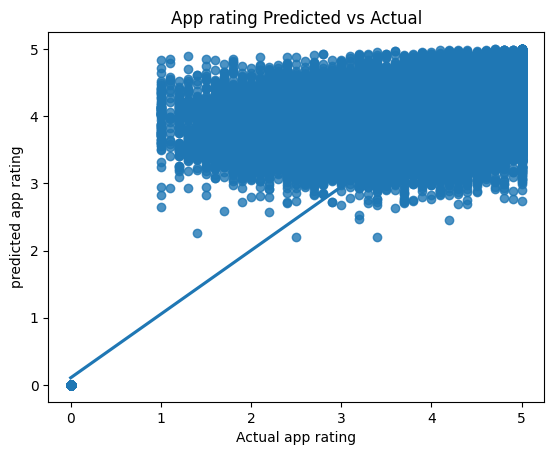

In [ ]:
sns.regplot(x=y_valid, y= prediction )
plt.title('App rating Predicted vs Actual')
plt.ylabel('predicted app rating')
plt.xlabel('Actual app rating')
fig1 = plt.gcf()
fig1.savefig('rating_pred_act.png')
plt.show()

In [ ]:
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['rating_count',
                                                   'minimum_installs',
                                                   'maximum_installs', 'price',
                                                   'average_reviews_per_cat',
                                                   'release_year',
                                                   'release_month',
                                                   'last_updated_year',
                                                   'last_updated_month']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['category', 'installs',
                                                   'free', 'currency',
                                                   'content_rating',
                                                   'ad_supported',
                                                   'in_app_purchases',
                                                   'editors_choice'])])),
                ('model', RandomForestRegressor(random_state=0))])

## CONDUCTING PREDICTIVE ANALYSIS ON MAXIMUM INSTALLS- USING XGBOOST REGRESSOR

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Select low cardinality categorical columns
categorical_cols = [cname for cname in merged_df.columns
                    if merged_df[cname].nunique() < 50 and merged_df[cname].dtype in ['object', 'bool']]

# Define numerical columns (excluding 'maximum_installs')
numerical_cols = [cname for cname in merged_df.columns
                  if merged_df[cname].dtype in ['int32', 'int64', 'float64'] and cname != 'maximum_installs']

# Combine selected features
feature_col = categorical_cols + numerical_cols

# Define new DataFrame for analysis
analy_df = merged_df[feature_col].copy()

# Define target variable (maximum installs)
y = merged_df['maximum_installs']
X = analy_df.copy()

# Split dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Preprocessing for categorical data
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the XGBRegressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Create and compile the pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

# Train the model
my_pipeline.fit(X_train, y_train)

# Make predictions
predictions = my_pipeline.predict(X_valid)

# Evaluate the model
mae = mean_absolute_error(y_valid, predictions)
print('MAE:', mae)

MAE: 138280.96875


In [ ]:
# Calculating R²
r2 = r2_score(y_valid, predictions)
print('R-Squared (R²):', r2)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_valid, predictions))
print('Root Mean Squared Error (RMSE):', rmse)

R-Squared (R²): 0.9210988283157349
Root Mean Squared Error (RMSE): 8286053.107796015


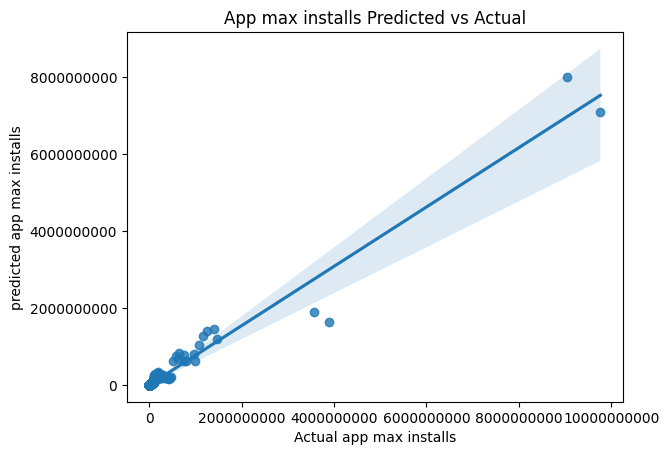

In [ ]:
import matplotlib.ticker as mticker

sns.regplot(x=y_valid, y=predictions)
plt.title('App max installs Predicted vs Actual')
plt.ylabel('predicted app max installs')
plt.xlabel('Actual app max installs')

# Format axis to prevent scientific notation
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='both')

fig1 = plt.gcf()
fig1.savefig('installs_pred_act.png')
plt.show()

In [ ]:
merged_df.maximum_installs.max()

12057627016

In [ ]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [ ]:
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['rating', 'rating_count',
                                                   'minimum_installs', 'price',
                                                   'average_reviews_per_cat',
                                                   'release_year',
                                                   'release_month',
                                                   'last_updated_year',
                                                   'last_updated_month']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['category', 'installs',
                                                   'free', 'currenc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [ ]:
my_pipeline # this will display the representation of the pipeline object

pipeline_string = str(my_pipeline)
print(pipeline_string)  # Prints the string representation of the pipeline, which is more copy/paste-friendly